<a href="https://colab.research.google.com/github/lesfgoh/Linear-Regression-Model/blob/main/RCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Load Data
traffic_raw <- read.table('/content/aadt.txt',header=FALSE)
traffic <-
  data.frame(y=traffic_raw$V1,x1=traffic_raw$V2,x2=traffic_raw$V3,x3=traffic_raw$V4, x4=traffic_raw$V5)
traffic


In [82]:
nrow(traffic)

[1] 121

In [ ]:
#convert data type of categorical variable from character to integer
# Convert character to factor
traffic$x4 <- as.factor(traffic$x4)

# Convert factor to integer
traffic$x4 <- as.integer(traffic$x4)
traffic


In [ ]:
# Replace 2 with 0
traffic$x4 <- ifelse(traffic$x4 == 2, 0, traffic$x4)
traffic$x4 <- as.numeric(traffic$x4)
traffic

In [ ]:
summary(traffic)


In [ ]:
plot(traffic)

In [ ]:
# keep these for normalising y later
y_mean <- mean(traffic$y)
y_sd <- sd(traffic$y)
y_mean
y_sd

In [ ]:
names(model0)

In [ ]:
summary_model0 <- summary(model0)
names(summary_model0)

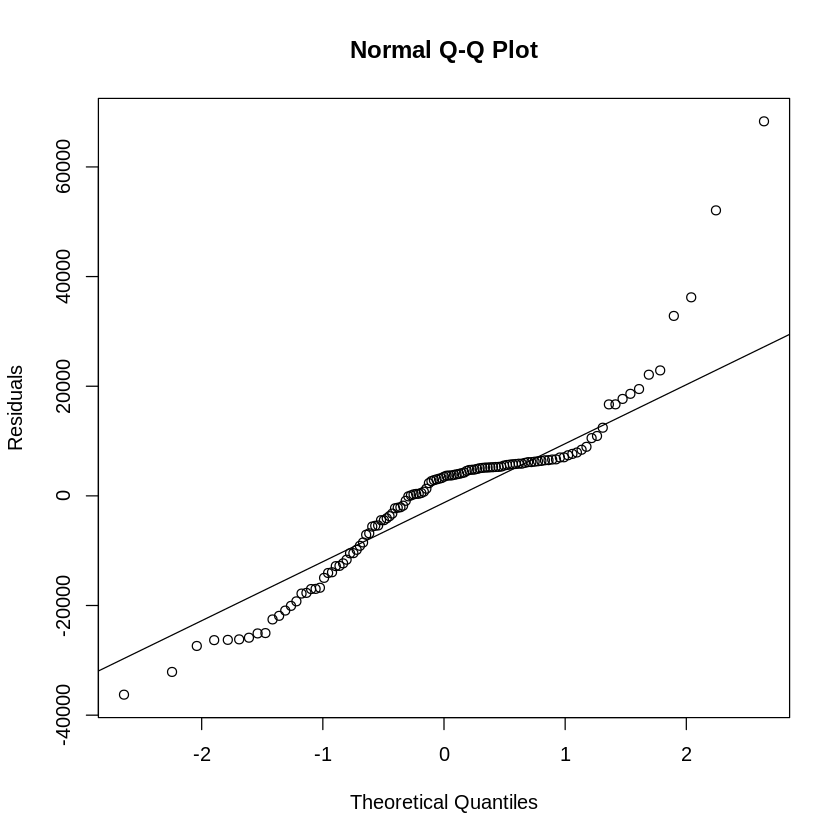

In [54]:
# Normality checking.
qqnorm(residuals(model0),ylab='Residuals')
qqline(residuals(model0))

# As we can tell from this model below, we have some evidence that the linear model is poor because the residuals do not follow a normal distribution. Next, we try the durbin-watson test.

In [ ]:
# Using the boxcox function from the MASS package
install.packages("MASS")
library(MASS)


In [ ]:
# Box-Cox transformation for response variable 'y'
bc <- boxcox(traffic$y ~ traffic$x1 + traffic$x2 + traffic$x3 + traffic$x4)
(lambda <- bc$x[which.max(bc$y)])


In [60]:
# Fit a multiple linear regression model.
model0 <- lm(y ~ x1+x2+x3+x4, data=traffic)

In [ ]:
model1 <- lm(((y^lambda-1)/lambda) ~ x1+x2+x3+x4, data=traffic)

In [ ]:
# Mentioned in google docs
model2 <- lm(((y^(1/3))) ~ log(x1)+log(x2)+log(x3)+x4, data=traffic)

In [ ]:
model3 <- lm(((y^(1/3))) ~ log(x1)+log(x2)+x4, data=traffic)

In [ ]:
model4 <- lm(((y^lambda-1)/lambda) ~ log(x1)+log(x2)+log(x3)+x4, data=traffic)

In [ ]:
model5 <- lm(((y^(1/3))) ~ log(x1) +(x2)^2 +log(x3)+x4, data=traffic)

In [ ]:
model6 <- lm(((y^(1/3))) ~ sqrt(log(x1)) + (x2) +log(x3)+x4, data=traffic)

In [ ]:
model7 <- lm(((y^(7/25))) ~ sqrt(x1) + log(x2) + log(x3)+x4, data=traffic)

In [ ]:
model8 <- lm(((y^(7/25))) ~ I(x1^(1/3)) + log(x2) + log(x3) +x4, data=traffic)

In [ ]:
model9 <- lm(((y^(7/25))) ~ log(x1) + log(x2) + log(x3) +x4, data=traffic)

In [ ]:
model10 <- lm(((y^(7/25))) ~ log(x1) + log(x2) +x4, data=traffic)

In [ ]:
model11 <- lm(((y^(7/20))) ~ log(x1) + log(x2) + log(x3) +x4, data=traffic)

In [ ]:
model12 <- lm(((y^(7/25))) ~ x1 + log(x2) +x4, data=traffic)

In [ ]:
model13 <- lm(((y-y_mean)/y_sd) ~ log(x1) + log(x2) + log(x3) +x4, data=traffic)

In [ ]:
model14 <- lm(((y-y_mean)/y_sd) ~ x1 + x2 + log(x3) +x4, data=traffic)

In [ ]:
model15 <- lm(((y-y_mean)/y_sd) ~ x1 + x2 + x3 +x4, data=traffic)

In [ ]:
summary(model0)

In [76]:
summary(model1)


Call:
lm(formula = ((y^lambda - 1)/lambda) ~ x1 + x2 + x3 + x4, data = traffic)

Residuals:
     Min       1Q   Median       3Q      Max 
-22.5212  -5.3053  -0.0776   4.8486  17.7194 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 8.354e+00  2.434e+00   3.432 0.000831 ***
x1          1.832e-05  2.181e-06   8.401 1.26e-13 ***
x2          7.154e+00  7.090e-01  10.090  < 2e-16 ***
x3          2.138e-02  5.757e-02   0.371 0.711055    
x4          9.554e+00  2.094e+00   4.563 1.26e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.084 on 116 degrees of freedom
Multiple R-squared:  0.8371,	Adjusted R-squared:  0.8315 
F-statistic:   149 on 4 and 116 DF,  p-value: < 2.2e-16


In [78]:
summary(model2)


Call:
lm(formula = ((y^(1/3))) ~ log(x1) + log(x2) + log(x3) + x4, 
    data = traffic)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.5008  -2.9013   0.1106   2.9432  12.1664 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -32.6991     4.8657  -6.720 7.13e-10 ***
log(x1)       2.9824     0.3127   9.538 2.87e-16 ***
log(x2)      12.7233     1.4376   8.850 1.16e-14 ***
log(x3)       1.4056     1.2714   1.106    0.271    
x4            7.7751     1.2506   6.217 8.22e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.354 on 116 degrees of freedom
Multiple R-squared:  0.8552,	Adjusted R-squared:  0.8502 
F-statistic: 171.2 on 4 and 116 DF,  p-value: < 2.2e-16


In [ ]:
summary(model3)

In [ ]:
summary(model4)

In [ ]:
summary(model5)

In [ ]:
summary(model6)

In [ ]:
summary(model7)

In [ ]:
summary(model8)

In [85]:
summary(model9)


Call:
lm(formula = ((y^(7/25))) ~ log(x1) + log(x2) + log(x3) + x4, 
    data = traffic)

Residuals:
   Min     1Q Median     3Q    Max 
-6.646 -1.498  0.053  1.448  6.416 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -14.6671     2.4450  -5.999 2.31e-08 ***
log(x1)       1.5311     0.1571   9.744  < 2e-16 ***
log(x2)       6.6009     0.7224   9.137 2.49e-15 ***
log(x3)       0.6528     0.6389   1.022    0.309    
x4            3.6975     0.6284   5.884 3.96e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.188 on 116 degrees of freedom
Multiple R-squared:  0.8571,	Adjusted R-squared:  0.8522 
F-statistic:   174 on 4 and 116 DF,  p-value: < 2.2e-16


In [84]:
summary(model10)


Call:
lm(formula = ((y^(7/25))) ~ log(x1) + log(x2) + x4, data = traffic)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.8357 -1.4785  0.0098  1.4809  6.3216 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -12.7979     1.6225  -7.888 1.80e-12 ***
log(x1)       1.5575     0.1550  10.048  < 2e-16 ***
log(x2)       6.6457     0.7212   9.215 1.54e-15 ***
x4            3.6349     0.6255   5.811 5.47e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.188 on 117 degrees of freedom
Multiple R-squared:  0.8559,	Adjusted R-squared:  0.8522 
F-statistic: 231.6 on 3 and 117 DF,  p-value: < 2.2e-16


In [59]:
install.packages("lmtest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
summary(model12)

In [ ]:
summary(model13)

In [ ]:
summary(model14)

In [ ]:
summary(model15)

In [ ]:
# Durbin-Watson test for model0

library(lmtest)
dwtest(y ~ x1+x2+x3+x4, data=traffic)

# As we can see from the Durbin-Watson test, we obtain a small p-value, and can reject the null hypothesis of no autocorrelation.
# This means that the residuals are dependent, which makes this model poor. Hence, we try the boxcox model instead.

#NOTE A BETTER VALUE IS CLOSER TO 2

In [ ]:
# Durbin-Watson test for model0
dwtest(model1, data=traffic)

In [ ]:
dwtest(model2, data=traffic)

In [ ]:
dwtest(model7, data=traffic)

In [79]:
dwtest(model9, data=traffic)


	Durbin-Watson test

data:  model9
DW = 1.7436, p-value = 0.05129
alternative hypothesis: true autocorrelation is greater than 0


In [ ]:
# Durbin-Watson test for final reduced model, model10
dwtest(model10, data=traffic)

In [ ]:
# Normality checking for model 1
qqnorm(residuals(model1),ylab='Residuals')
qqline(residuals(model1))

# As we can see, the QQ plot shows that the residuals for the boxcox model more closely follows a normal distribution, suggesting that this model is more adequate.

In [ ]:
# Normality checking for model 2
qqnorm(residuals(model2),ylab='Residuals')
qqline(residuals(model2))

In [ ]:
# Normality checking for the transformed model
qqnorm(residuals(model3),ylab='Residuals')
qqline(residuals(model3))

In [ ]:
# Normality checking for the transformed model
qqnorm(residuals(model4),ylab='Residuals')
qqline(residuals(model4))

In [ ]:
# Normality checking for the transformed model
qqnorm(residuals(model5),ylab='Residuals')
qqline(residuals(model5))

In [ ]:
# Normality checking for the model 6
qqnorm(residuals(model6),ylab='Residuals')
qqline(residuals(model6))

In [ ]:
# Normality checking for model 13
qqnorm(residuals(model13),ylab='Residuals')
qqline(residuals(model13))

In [ ]:
# Normality checking for model 14
qqnorm(residuals(model14),ylab='Residuals')
qqline(residuals(model14))

In [ ]:
# Normality checking for model 15
qqnorm(residuals(model15),ylab='Residuals')
qqline(residuals(model15))

Transforming a non-normally distributed dataset into a more normally distributed one can be beneficial for several reasons when performing linear regression, including multi-linear regression:

Assumption of Normality: The classical linear regression models assume that the residuals (the differences between the observed and predicted values) are normally distributed. If the residuals are not normally distributed, it may violate the assumptions of the regression model. Transforming the dependent variable (the response variable) can help meet this assumption, making the results more reliable and improving the validity of statistical tests.

Statistical Inference and Hypothesis Testing: Many statistical tests and inference procedures are based on the assumption of normality. Transforming the data to achieve normality can make the results of hypothesis tests more reliable. This is particularly important when making inferences about the coefficients of the regression model or conducting hypothesis tests.

In [ ]:
# Linear Model 0
par(mfrow=c(1,2))
#we don't have specific time component in our data, and we are not sure if the data is arranged in order of observations with respect to time.
#hence, the residuals against time plot may not provide informative insignts
plot(residuals(model0),ylab='Residuals',xlab='Time')
plot(fitted(model0), residuals(model0),ylab='Residuals',xlab='Fitted values')
plot(traffic$x1, residuals(model0),ylab='Residuals',xlab='X1')
plot(traffic$x2, residuals(model0),ylab='Residuals',xlab='X2')
plot(traffic$x3, residuals(model0),ylab='Residuals',xlab='X3')
plot(traffic$x4, residuals(model0),ylab='Residuals',xlab='X4')
par(mfrow=c(1,1))

In [ ]:
# Model 1
par(mfrow=c(1,2))
#we don't have specific time component in our data, and we are not sure if the data is arranged in order of observations with respect to time.
#hence, the residuals against time plot may not provide informative insignts
plot(residuals(model1),ylab='Residuals',xlab='Time')
plot(fitted(model1),residuals(model1),ylab='Residuals',xlab='Fitted values')
plot(traffic$x1,residuals(model1),ylab='Residuals',xlab='X1')
plot(traffic$x2,residuals(model1),ylab='Residuals',xlab='X2')
plot(traffic$x3,residuals(model1),ylab='Residuals',xlab='X3')
plot(traffic$x4,residuals(model1),ylab='Residuals',xlab='X4')
par(mfrow=c(1,1))

Interpretation:

Residuals vs. Fitted Values Plot:
Look for patterns or trends in the residuals. If you observe a systematic pattern, it indicates that the model is not capturing certain aspects of the data. For example, a U-shaped pattern may suggest non-linearity.
Check for heteroscedasticity (unequal variance) by examining the spread of residuals across the range of fitted values. If the spread widens or narrows systematically, it suggests heteroscedasticity.
Residuals vs. Actual Values Plot:
Assess how well the model is capturing the variability in the actual data. A random scatter of points indicates that the model is performing well.
Look for any patterns or trends in the residuals concerning the actual values. Patterns might suggest issues with model fit, non-linearity, or omitted variables.

In [ ]:
# Model 2
par(mfrow=c(1,2))
#we don't have specific time component in our data, and we are not sure if the data is arranged in order of observations with respect to time.
#hence, the residuals against time plot may not provide informative insignts
plot(residuals(model2),ylab='Residuals',xlab='Time')
plot(fitted(model2),residuals(model2),ylab='Residuals',xlab='Fitted values')
plot(log(traffic$x1),residuals(model2),ylab='Residuals',xlab='log(X1)')
plot(log(traffic$x2),residuals(model2),ylab='Residuals',xlab='log(X2)')
plot(log(traffic$x3),residuals(model2),ylab='Residuals',xlab='log(X3)')
plot(traffic$x4,residuals(model2),ylab='Residuals',xlab='X4')
par(mfrow=c(1,1))

In [ ]:
# Model 3
par(mfrow=c(1,2))
#we don't have specific time component in our data, and we are not sure if the data is arranged in order of observations with respect to time.
#hence, the residuals against time plot may not provide informative insignts
plot(residuals(model3),ylab='Residuals',xlab='Time')
plot(fitted(model3),residuals(model3),ylab='Residuals',xlab='Fitted values')
plot(log(traffic$x1),residuals(model3),ylab='Residuals',xlab='X1')
plot(log(traffic$x2),residuals(model3),ylab='Residuals',xlab='X2')
plot(traffic$x4,residuals(model3),ylab='Residuals',xlab='X4')
par(mfrow=c(1,1))

In [ ]:
# Model 4
par(mfrow=c(1,2))
#we don't have specific time component in our data, and we are not sure if the data is arranged in order of observations with respect to time.
#hence, the residuals against time plot may not provide informative insignts
plot(residuals(model4),ylab='Residuals',xlab='Time')
plot(fitted(model4),residuals(model4),ylab='Residuals',xlab='Fitted values')
plot(log(traffic$x1),residuals(model4),ylab='Residuals',xlab='log(X1)')
plot(log(traffic$x2),residuals(model4),ylab='Residuals',xlab='log(X2)')
plot(log(traffic$x3),residuals(model4),ylab='Residuals',xlab='log(X3)')
plot(traffic$x4,residuals(model4),ylab='Residuals',xlab='X4')
par(mfrow=c(1,1))

In [ ]:
# Model 5
par(mfrow=c(1,2))
#we don't have specific time component in our data, and we are not sure if the data is arranged in order of observations with respect to time.
#hence, the residuals against time plot may not provide informative insignts
plot(residuals(model5),ylab='Residuals',xlab='Time')
plot(fitted(model5),residuals(model5),ylab='Residuals',xlab='Fitted values')
plot(log(traffic$x1),residuals(model5),ylab='Residuals',xlab='log(X1)')
plot((traffic$x2)^2,residuals(model5),ylab='Residuals',xlab='(X2)^2')
plot(log(traffic$x3),residuals(model5),ylab='Residuals',xlab='log(X3)')
plot(traffic$x4,residuals(model5),ylab='Residuals',xlab='X4')
par(mfrow=c(1,1))

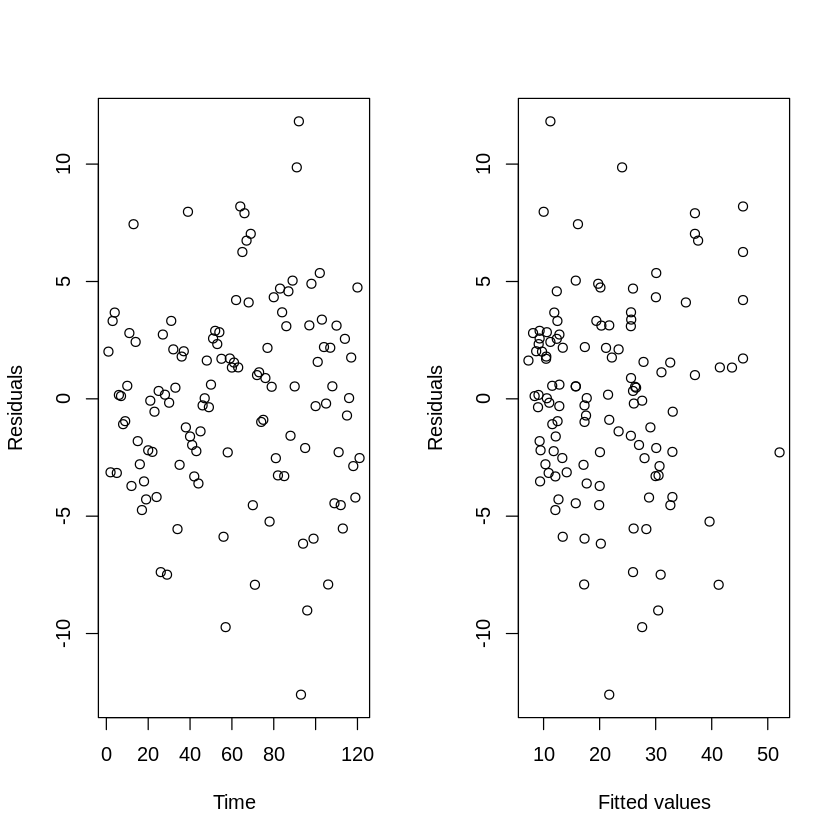

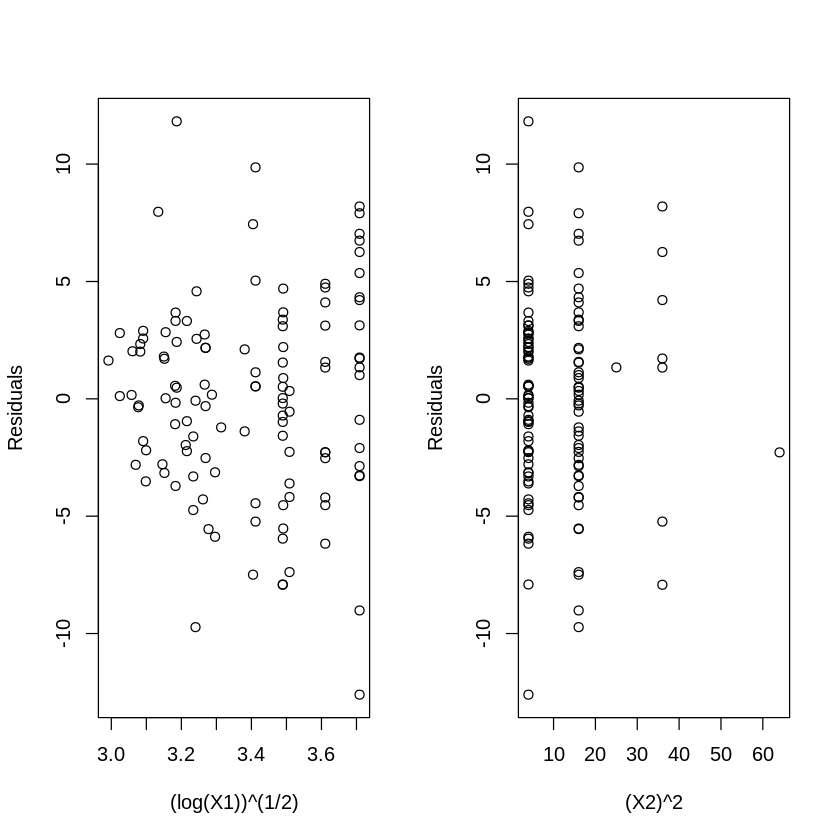

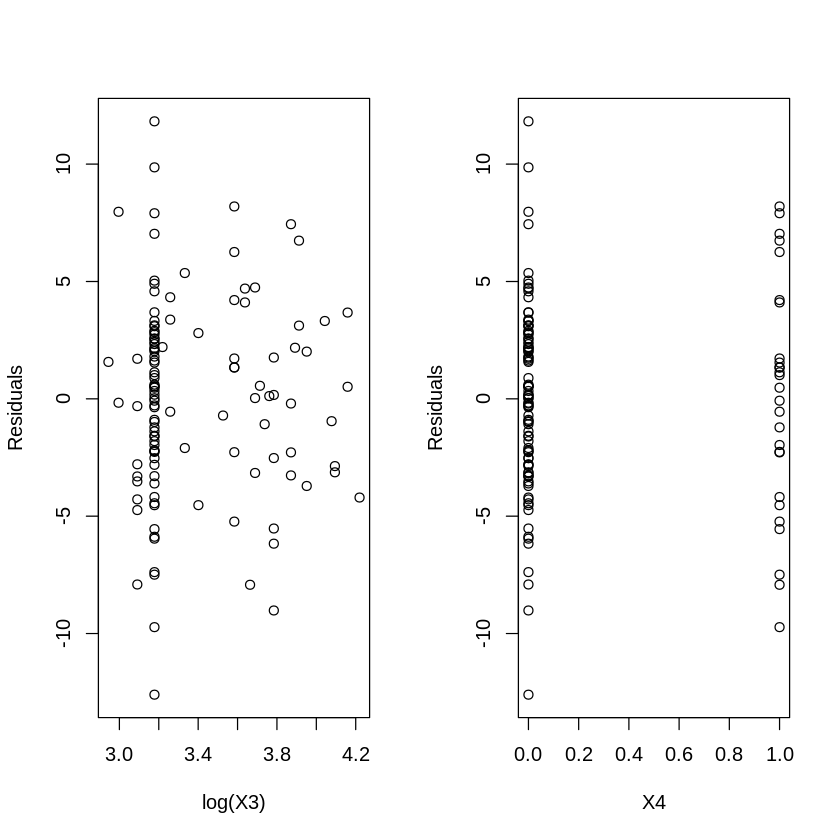

In [72]:
# Model 6
par(mfrow=c(1,2))
#we don't have specific time component in our data, and we are not sure if the data is arranged in order of observations with respect to time.
#hence, the residuals against time plot may not provide informative insignts
plot(residuals(model6),ylab='Residuals',xlab='Time')
plot(fitted(model6),residuals(model6),ylab='Residuals',xlab='Fitted values')
plot(sqrt(log(traffic$x1)),residuals(model6),ylab='Residuals',xlab='(log(X1))^(1/2)')
plot((traffic$x2)^2,residuals(model6),ylab='Residuals',xlab='(X2)^2')
plot(log(traffic$x3),residuals(model6),ylab='Residuals',xlab='log(X3)')
plot(traffic$x4,residuals(model6),ylab='Residuals',xlab='X4')
par(mfrow=c(1,1))

In [ ]:
# Model 7
par(mfrow=c(1,2))
#we don't have specific time component in our data, and we are not sure if the data is arranged in order of observations with respect to time.
#hence, the residuals against time plot may not provide informative insignts
plot(residuals(model7),ylab='Residuals',xlab='Time')
plot(fitted(model7),residuals(model7),ylab='Residuals',xlab='Fitted values')
plot(sqrt(traffic$x1),residuals(model7),ylab='Residuals',xlab='(X1)^(1/2)')
plot(log(traffic$x2),residuals(model7),ylab='Residuals',xlab='log(X2)')
plot(log(traffic$x3),residuals(model7),ylab='Residuals',xlab='log(X3)')
plot(traffic$x4,residuals(model7),ylab='Residuals',xlab='X4')
par(mfrow=c(1,1))

In [ ]:
# Model 8
par(mfrow=c(1,2))
#we don't have specific time component in our data, and we are not sure if the data is arranged in order of observations with respect to time.
#hence, the residuals against time plot may not provide informative insignts
plot(residuals(model8),ylab='Residuals',xlab='Time')
plot(fitted(model8),residuals(model8),ylab='Residuals',xlab='Fitted values')
plot((traffic$x1)^(1/3),residuals(model8),ylab='Residuals',xlab='X1^(1/3)')
plot(log(traffic$x2),residuals(model8),ylab='Residuals',xlab='log(X2)')
plot(log(traffic$x3),residuals(model8),ylab='Residuals',xlab='log(X3)')
plot(traffic$x4,residuals(model8),ylab='Residuals',xlab='X4')
par(mfrow=c(1,1))

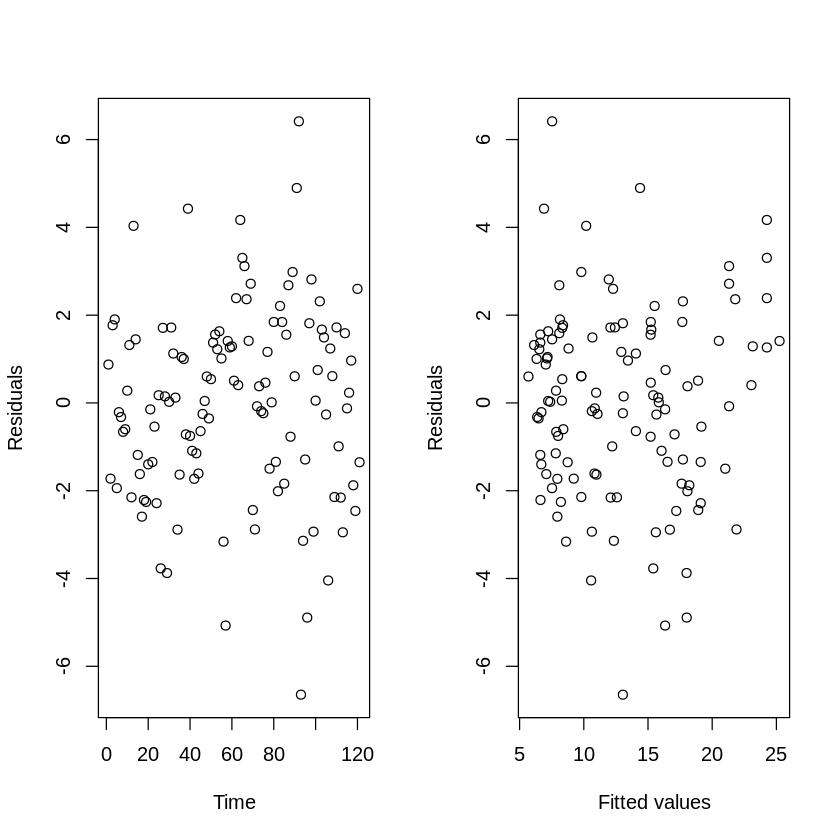

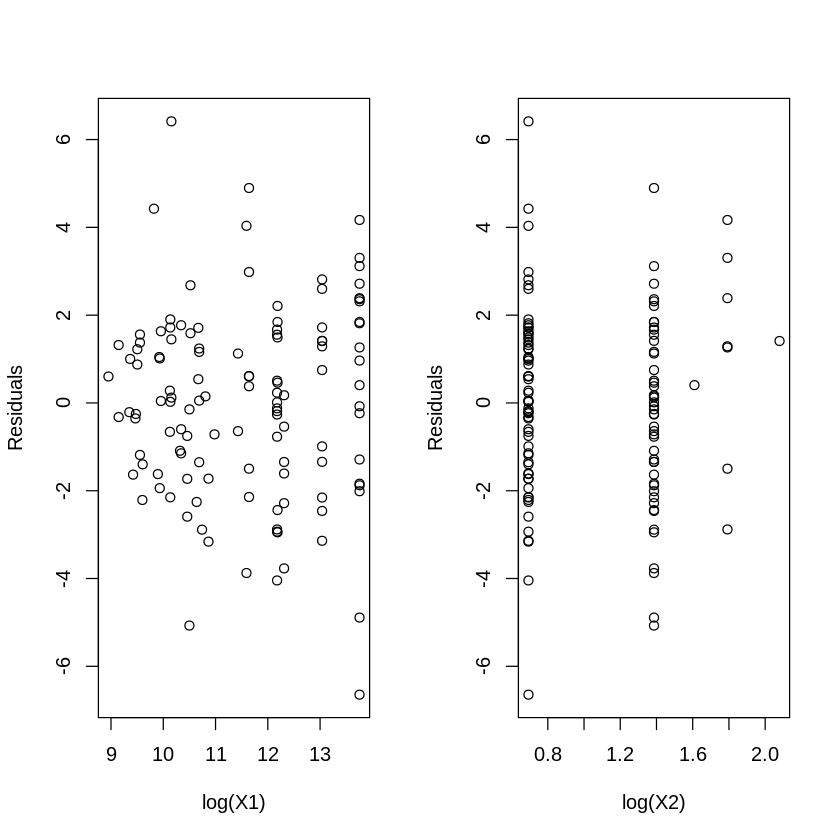

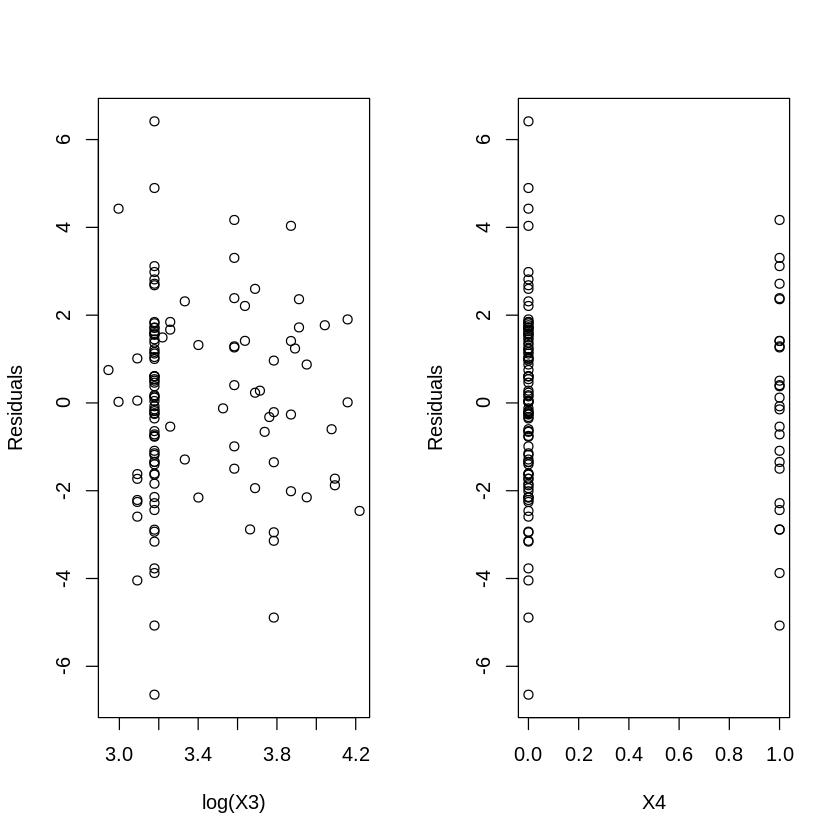

In [80]:
 # Model 9
 par(mfrow=c(1,2))
 #we don't have specific time component in our data, and we are not sure if the data is arranged in order of observations with respect to time.
 #hence, the residuals against time plot may not provide informative insignts
 plot(residuals(model9),ylab='Residuals',xlab='Time')
 plot(fitted(model9),residuals(model9),ylab='Residuals',xlab='Fitted values')
 plot(log(traffic$x1),residuals(model9),ylab='Residuals',xlab='log(X1)')
 plot(log(traffic$x2),residuals(model9),ylab='Residuals',xlab='log(X2)')
 plot(log(traffic$x3),residuals(model9),ylab='Residuals',xlab='log(X3)')
 plot(traffic$x4,residuals(model9),ylab='Residuals',xlab='X4')
 par(mfrow=c(1,1))

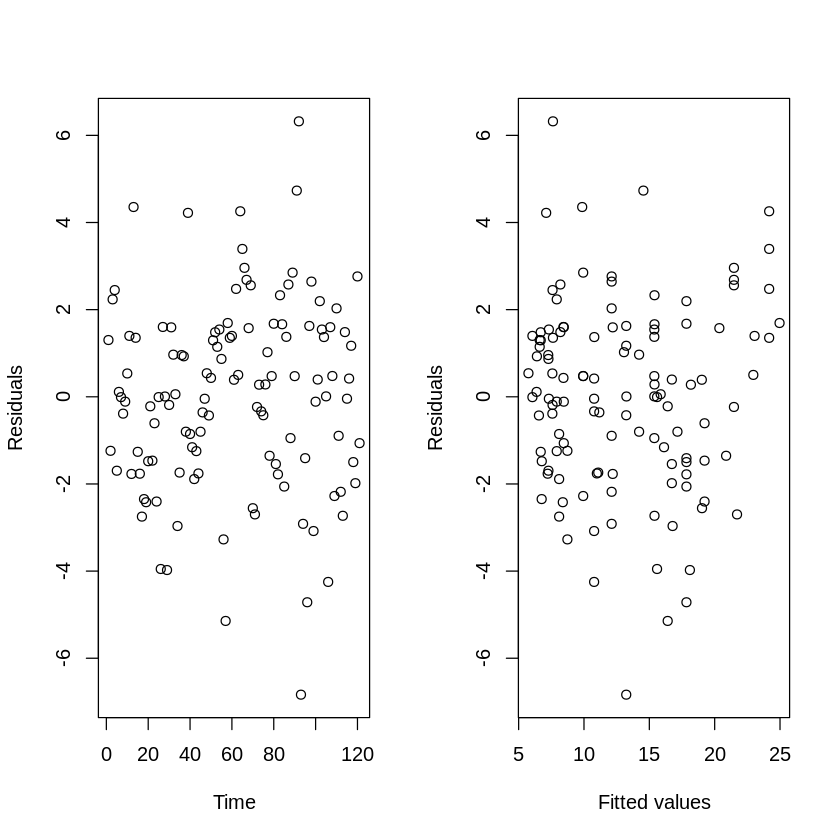

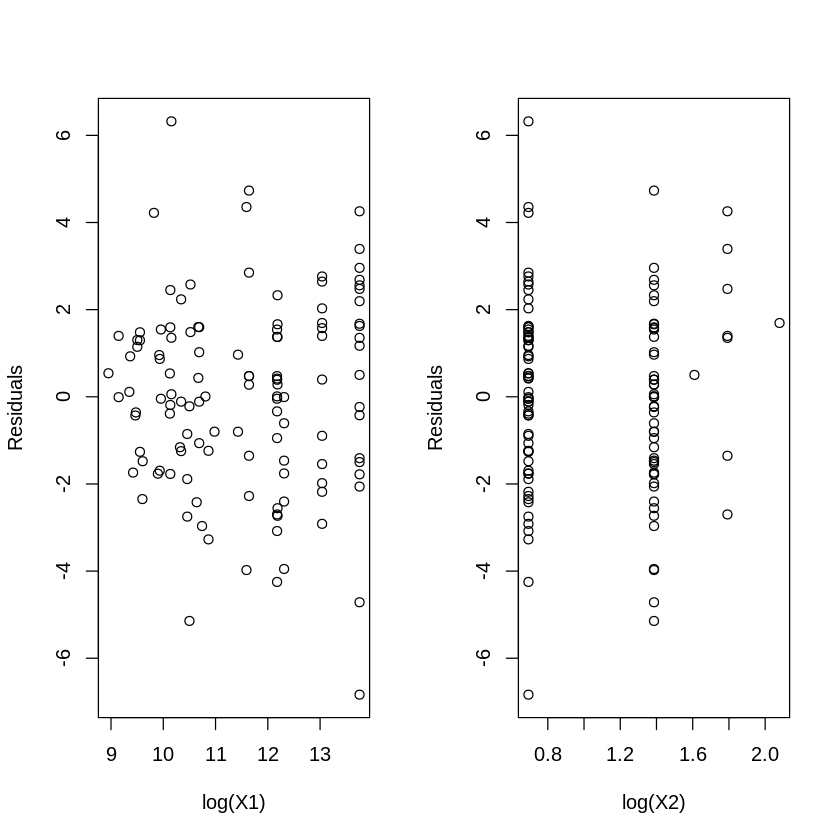

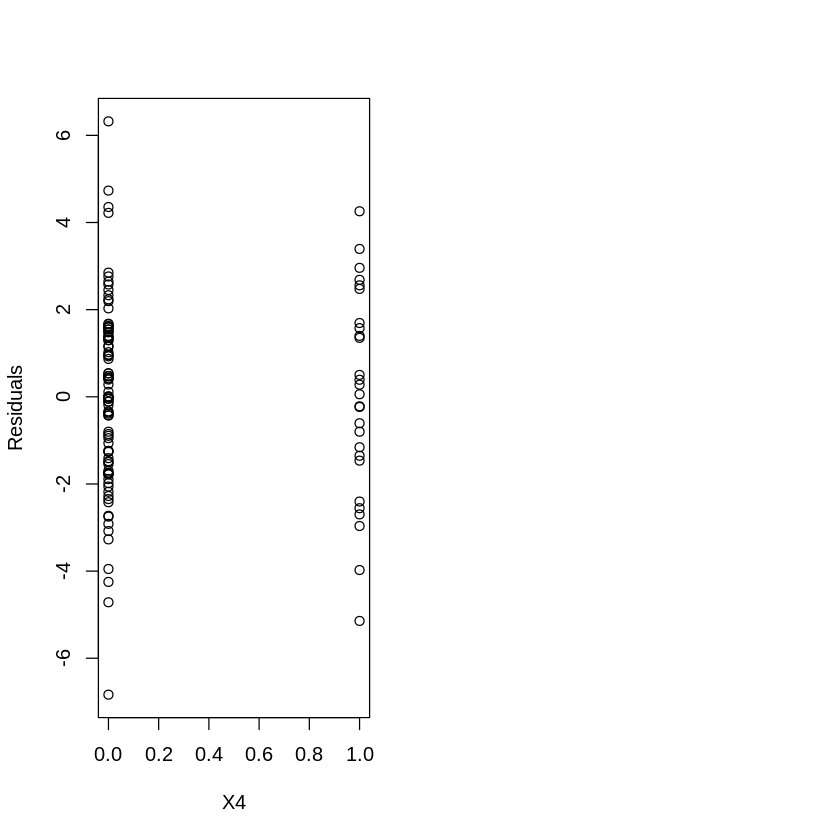

In [74]:
# Model 10
 par(mfrow=c(1,2))
 #we don't have specific time component in our data, and we are not sure if the data is arranged in order of observations with respect to time.
 #hence, the residuals against time plot may not provide informative insignts
 plot(residuals(model10),ylab='Residuals',xlab='Time')
 plot(fitted(model10),residuals(model10),ylab='Residuals',xlab='Fitted values')
 plot(log(traffic$x1),residuals(model10),ylab='Residuals',xlab='log(X1)')
 plot(log(traffic$x2),residuals(model10),ylab='Residuals',xlab='log(X2)')
 plot(traffic$x4,residuals(model10),ylab='Residuals',xlab='X4')
 par(mfrow=c(1,1))

In [ ]:
# Model 12
par(mfrow=c(1,2))
#we don't have specific time component in our data, and we are not sure if the data is arranged in order of observations with respect to time.
#hence, the residuals against time plot may not provide informative insignts
plot(residuals(model12),ylab='Residuals',xlab='Time')
plot(fitted(model12),residuals(model12),ylab='Residuals',xlab='Fitted values')
plot(traffic$x1,residuals(model12),ylab='Residuals',xlab='X1')
plot(log(traffic$x2),residuals(model12),ylab='Residuals',xlab='log(X2)')
plot(traffic$x4,residuals(model12),ylab='Residuals',xlab='X4')
par(mfrow=c(1,1))

In [ ]:
# Having found an appropriate model, model9, we proceed to conduct F-tests on it to observe whether all of the predictor variables are significant.
# We first test the significance of log(x3) because we see that from summary(model9) that log(x3) has a low t-statistic or 1.022.

# CONDUCTING F-TEST FOR MODEL 9
# Basic reduced models: Checking B3 = 0
summary(model10)
anova(model10,model9)

As seen here, our F-statistic is very low, and Pr(>F) shows a very high value. This means that we fail to reject the H0 hypothesis at the 30% level, making it very likely that X3 is not statistically significant. Next, we conduct the stepAIC test to affirm our findings.

As seen we here, we use the Akaike Information Criteria (AIC) to compare the full model against the reduced model. THEREFORE we choose model11, which is the reduced model, to model our predictions.

Ifd < dL,then there is positively serially correlated;
If d > 4 − d L , then there is negatively serially correlated;
IfdU < d < 4−dU , then there is no serially correlated.


A third outcome is also possible. If the test statistic value lies between dL and dU, the test is inconclusive. In this context, you might err on the side of conservatism and not reject the null hypothesis.


In [ ]:
step <- stepAIC(model9, direction = "both")
step

Start:  AIC=194.35
((y^(7/25))) ~ log(x1) + log(x2) + log(x3) + x4

          Df Sum of Sq     RSS    AIC
- log(x3)  1      5.00  560.22 193.44
<none>                  555.22 194.35
- x4       1    165.71  720.93 223.96
- log(x2)  1    399.63  954.85 257.96
- log(x1)  1    454.49 1009.71 264.72

Step:  AIC=193.44
((y^(7/25))) ~ log(x1) + log(x2) + x4

          Df Sum of Sq     RSS    AIC
<none>                  560.22 193.44
+ log(x3)  1      5.00  555.22 194.35
- x4       1    161.68  721.90 222.12
- log(x2)  1    406.57  966.79 257.46
- log(x1)  1    483.45 1043.66 266.72



Call:
lm(formula = ((y^(7/25))) ~ log(x1) + log(x2) + x4, data = traffic)

Coefficients:
(Intercept)      log(x1)      log(x2)           x4  
    -12.798        1.558        6.646        3.635  


In [ ]:
anova(model10, model9)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,117,560.2185,NA,NA,NA,NA
2,116,555.2210,1,4.997533,1.044114,0.308993


In [56]:
mlrs<-summary(model10)

In [57]:
# Prediction
con <- c(1, log(50000),log(3),0)
#creates a vector named con with five elements: 1, 50000, 3, 60, and 2
lhat <- sum(con*coef(model10))
lhat #linear prediction based on the linear regression model
y_pred <- lhat^(25/7)
y_pred
t05 <- qt(0.975,117) #a two-tailed test with a confidence level of 95%, with 117 degrees of freedom
bm <- t05*mlrs$sigma*sqrt(con%*%mlrs$cov.unscaled%*%con) #standard error
c(lhat-bm,lhat+bm)#confidence interval
c3 <- 1
bm <- t05*mlrs$sigma*sqrt(con%*%mlrs$cov.unscaled%*%con+c3)
#new standard error (bm) with constant (c3)
c(lhat-bm,lhat+bm)
con <- data.frame(x1=50000,x2=3, x4=0)
#creates a data frame named con with four variables (x1, x2, x3, x4) and sets their values
predict(model10,con,interval='confidence',level=0.95) #predict the response variable
predict(model10,con,interval='prediction',level=0.95) #prediction interval

[1] 11.35549

[1] 5869.383

[1] 10.78642 11.92456

[1]  6.984682 15.726298

,fit,lwr,upr
1,11.35549,10.78642,11.92456


,fit,lwr,upr
1,11.35549,6.984682,15.7263
